In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

# Data preprocessing

In [2]:
data = pd.read_csv("COMPLETE_DATA.csv",sep=";", decimal='.') #import dataset
data.head() #Visualize first 5 rows of dataset

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,1.6712,0.0001,2.0400,0.7129,0.3687
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,1.6898,0.0004,2.0409,0.7129,0.3511
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,1.7185,0.0004,2.0314,0.7090,0.3129
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,1.7692,0.0000,2.0348,0.7142,0.2656
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,1.8047,0.0000,2.0267,0.7106,0.2220


In [3]:
data.shape #visualize dataset dimensions

(10582, 11)

In [4]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values #select only input features
Y = data["1st_exc_f"].values #select outupt variable

In [5]:
#Data splitting into training and testing, with 20% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

In [6]:
#Data preprocessing with Standard Scaling, removing mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
type(y_train[0])

numpy.float64

In [8]:
X_train.shape[1]

4

# Neural Network

In [60]:
#Building Neural Network architecture
model = Sequential()
model.add(Dense(32, input_shape=(4,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [61]:
#Choose optimization parameters
model.compile(loss='mse', optimizer='adam')

In [62]:
#A brief summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                160       
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [63]:
#number of epochs used for training
num_epochs = 1000

In [64]:
#callback = EarlyStopping(monitor="val_loss", patience=100, verbose=1)

In [65]:
#Model training
#%%time
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.0378 - val_loss: 0.0150
Epoch 2/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0115
Epoch 3/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 4/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 5/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 6/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 7/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 8/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 9/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 10/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.005

Epoch 79/1000
239/239 [==============================] - 0s 1ms/step - loss: 7.0098e-04 - val_loss: 7.2053e-04
Epoch 80/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.7738e-04 - val_loss: 7.6729e-04
Epoch 81/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.7314e-04 - val_loss: 0.0012
Epoch 82/1000
239/239 [==============================] - 0s 1ms/step - loss: 7.0877e-04 - val_loss: 7.4645e-04
Epoch 83/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.6081e-04 - val_loss: 8.5744e-04
Epoch 84/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.6739e-04 - val_loss: 7.2345e-04
Epoch 85/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.7410e-04 - val_loss: 7.6128e-04
Epoch 86/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.2105e-04 - val_loss: 9.5447e-04
Epoch 87/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.9109e-04 - val_loss: 0.0011
Epoch 88/

239/239 [==============================] - 0s 1ms/step - loss: 4.1743e-04 - val_loss: 6.1350e-04
Epoch 226/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.0029e-04 - val_loss: 4.5102e-04
Epoch 227/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.2029e-04 - val_loss: 5.8763e-04
Epoch 228/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.4137e-04 - val_loss: 6.2613e-04
Epoch 229/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.3885e-04 - val_loss: 5.1730e-04
Epoch 230/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.9510e-04 - val_loss: 5.0055e-04
Epoch 231/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.8781e-04 - val_loss: 6.5216e-04
Epoch 232/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.3133e-04 - val_loss: 4.3550e-04
Epoch 233/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.5558e-04 - val_loss: 7.9870e-04
Epoch 2

239/239 [==============================] - 0s 1ms/step - loss: 4.1045e-04 - val_loss: 4.4101e-04
Epoch 372/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.0287e-04 - val_loss: 3.6749e-04
Epoch 373/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.0648e-04 - val_loss: 6.0629e-04
Epoch 374/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.2073e-04 - val_loss: 4.1439e-04
Epoch 375/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.7262e-04 - val_loss: 4.4761e-04
Epoch 376/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.3027e-04 - val_loss: 3.9979e-04
Epoch 377/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.4395e-04 - val_loss: 4.0522e-04
Epoch 378/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.2541e-04 - val_loss: 7.2654e-04
Epoch 379/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1616e-04 - val_loss: 6.2774e-04
Epoch 3

239/239 [==============================] - 0s 1ms/step - loss: 2.7890e-04 - val_loss: 3.9673e-04
Epoch 518/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7739e-04 - val_loss: 3.5862e-04
Epoch 519/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1562e-04 - val_loss: 4.3966e-04
Epoch 520/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.6808e-04 - val_loss: 3.6488e-04
Epoch 521/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6165e-04 - val_loss: 3.5163e-04
Epoch 522/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7104e-04 - val_loss: 5.5647e-04
Epoch 523/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1200e-04 - val_loss: 3.7161e-04
Epoch 524/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6733e-04 - val_loss: 4.4971e-04
Epoch 525/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.8258e-04 - val_loss: 3.6564e-04
Epoch 5

239/239 [==============================] - 0s 1ms/step - loss: 2.8178e-04 - val_loss: 3.3974e-04
Epoch 664/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3917e-04 - val_loss: 2.9707e-04
Epoch 665/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4105e-04 - val_loss: 3.8627e-04
Epoch 666/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7361e-04 - val_loss: 3.8482e-04
Epoch 667/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7349e-04 - val_loss: 4.5551e-04
Epoch 668/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7996e-04 - val_loss: 3.6347e-04
Epoch 669/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4984e-04 - val_loss: 3.7000e-04
Epoch 670/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6017e-04 - val_loss: 3.9359e-04
Epoch 671/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6889e-04 - val_loss: 3.9029e-04
Epoch 6

239/239 [==============================] - 0s 1ms/step - loss: 2.2321e-04 - val_loss: 3.6226e-04
Epoch 810/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5327e-04 - val_loss: 6.5484e-04
Epoch 811/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1734e-04 - val_loss: 3.4289e-04
Epoch 812/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3934e-04 - val_loss: 3.1274e-04
Epoch 813/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3107e-04 - val_loss: 3.2097e-04
Epoch 814/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4311e-04 - val_loss: 4.1016e-04
Epoch 815/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4243e-04 - val_loss: 3.6914e-04
Epoch 816/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4347e-04 - val_loss: 3.2173e-04
Epoch 817/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2476e-04 - val_loss: 4.1908e-04
Epoch 8

239/239 [==============================] - 0s 1ms/step - loss: 2.2296e-04 - val_loss: 4.1655e-04
Epoch 956/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7466e-04 - val_loss: 3.3053e-04
Epoch 957/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2846e-04 - val_loss: 3.5252e-04
Epoch 958/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5553e-04 - val_loss: 2.6942e-04
Epoch 959/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4233e-04 - val_loss: 3.6853e-04
Epoch 960/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4289e-04 - val_loss: 2.6699e-04
Epoch 961/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3940e-04 - val_loss: 3.2529e-04
Epoch 962/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1375e-04 - val_loss: 3.5908e-04
Epoch 963/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1333e-04 - val_loss: 3.7082e-04
Epoch 9

# Model Evaluation

In [66]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 915us/step - loss: 4.4790e-04


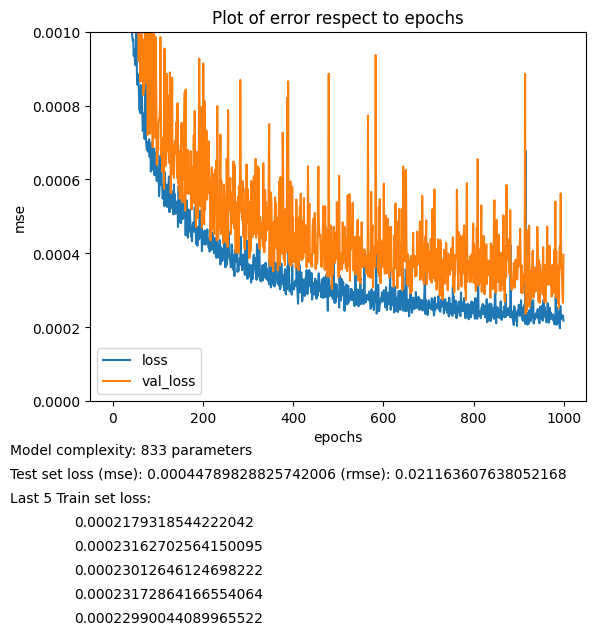

In [67]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-3])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [32]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [33]:
model.predict(emp_test)

array([[6.7013755]], dtype=float32)

# Scatter plot

In [68]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [69]:
pred = predictions(X_test)

In [70]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.0004478984222274022

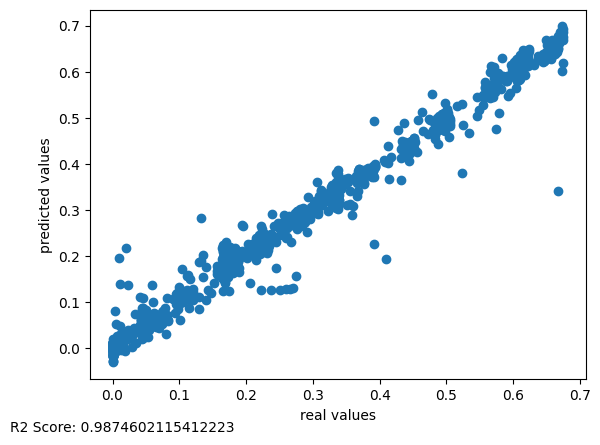

In [71]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [26]:
model.save('CPL_meV.h5')

In [29]:
from keras.models import load_model
model2 = load_model('CPL_meV.h5')

In [32]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model2.predict(k))) 
    return pred

In [33]:
pred = predictions(X_test)

In [34]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.012320350990509602